<a href="https://colab.research.google.com/github/ranjithrece/Projects/blob/main/Resume_Screening_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Resume Screening with python*
 In this notebook we are going to classify job categories by the resume letter.

 You can get the datesets zip file [here](https://www.kaggle.com/dhainjeamita/updatedresumedataset/download)

In [70]:
# importing req libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import wordcloud 
import seaborn as sns 

In [71]:
path = '/content/drive/MyDrive/Datasets/Resume/UpdatedResumeDataSet.csv'
df = pd.read_csv(path,encoding = 'utf-8')#reading the file
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [72]:
df.shape 

(962, 2)

In [73]:
df.Category.value_counts() #counting the occurence of the job title

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Blockchain                   40
Sales                        40
Operations Manager           40
Mechanical Engineer          40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [74]:
print('Categories:')
print(df.Category.unique())#unique job category

Categories:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


##Visualizing

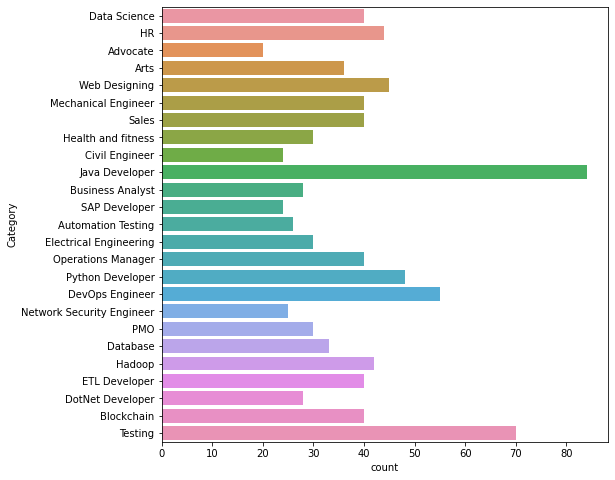

In [75]:
plt.figure(figsize=(8,8))
sns.countplot(y = 'Category',data = df)#ploting the occurence in countplot via sns library

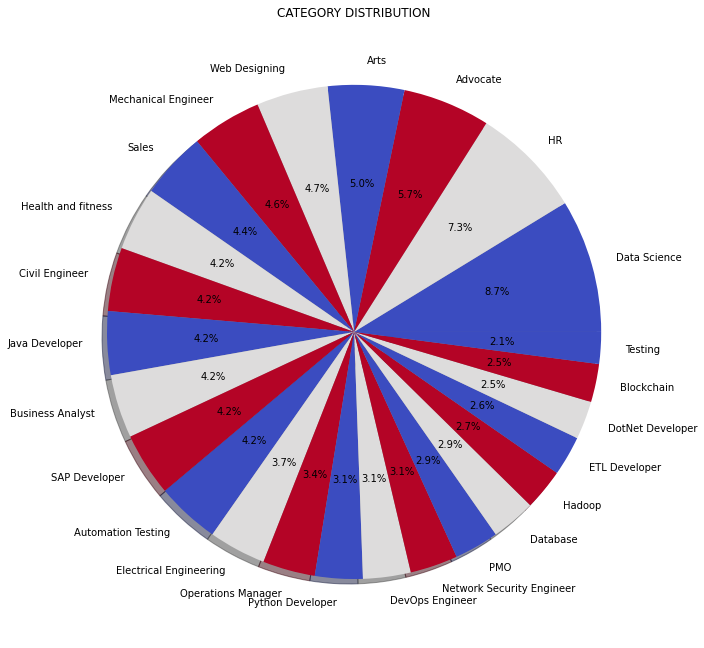

In [76]:
#visualizing the distribution of categories

from matplotlib.gridspec import GridSpec
cat_val = df.Category.value_counts() 
cat = df.Category.unique() 
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(cat_val, labels=cat, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

##Cleaning text

In [77]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['Cleaned_Resume'] = df.Resume.apply(lambda x : cleanResume(x))

In [78]:
print(df['Cleaned_Resume'][1])

Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github com

In [80]:
import nltk
import string

from nltk.corpus import stopwords#nltk's prebuilt stopwords list

StopWords = set(stopwords.words('english')+['``',"''"])#add extra stopwords

total_words = []
cleanedSent = ''
Sent = df.Resume.values

for i in range(150):#we are looking for 150 resumes for mosst occured words in resume
  sent = cleanResume(Sent[i])
  cleanedSent += sent
  words = nltk.word_tokenize(sent) #tokenizing
  for w in words:
    if w  not in StopWords and w not in string.punctuation:
      total_words.append(w)

wordfreqdist = nltk.FreqDist(total_words)# it counts the frequency in tokens
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)
  

[('Details', 452), ('Exprience', 402), ('months', 340), ('company', 300), ('description', 280), ('1', 256), ('year', 224), ('January', 206), ('Data', 200), ('Less', 196), ('data', 182), ('Python', 156), ('Skill', 156), ('Science', 154), ('6', 148), ('I', 142), ('Maharashtra', 142), ('Education', 134), ('College', 130), ('like', 122), ('The', 118), ('Learning', 116), ('Machine', 112), ('India', 112), ('University', 102), ('using', 100), ('project', 100), ('monthsCompany', 94), ('learning', 90), ('Arts', 90), ('B', 88), ('C', 86), ('Mumbai', 86), ('SQL', 80), ('A', 78), ('Responsibilities', 76), ('Pune', 74), ('time', 72), ('various', 72), ('Engineering', 72), ('Project', 72), ('projects', 72), ('development', 70), ('Web', 70), ('Management', 70), ('Council', 70), ('SAP', 68), ('knowledge', 66), ('Company', 66), ('Skills', 64)]


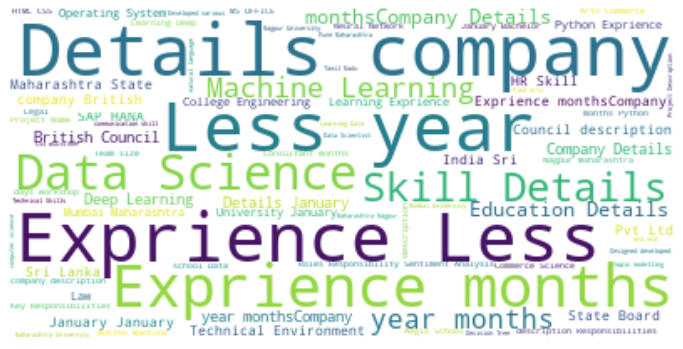

In [81]:
'''visualizing using wordcloud
    wordcloud is a library to visualize the most ocuured words in text'''
    
cloud = wordcloud.WordCloud(background_color='white').generate(cleanedSent)
plt.figure(figsize=(12,12))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
from sklearn.preprocessing import LabelEncoder # encoding the categorical variables to int 

le = LabelEncoder()
df['Category'] = le.fit_transform(df.Category)

In [110]:
df['Category'].head()

0    6
1    6
2    6
3    6
4    6
Name: Category, dtype: int64

##Training 

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #text vectorizer
#classifiers
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

reqText = df.Cleaned_Resume.values
y = df.Category.values

x_train,x_test,y_train,y_test = train_test_split(reqText,y,stratify=y,random_state=7,test_size=0.2)#spliting the data

tfid = TfidfVectorizer(stop_words = 'english',max_features=1500)
train_tfid = tfid.fit_transform(x_train)

test_tfid = tfid.transform(x_test)


In [138]:
model = KNeighborsClassifier()
model.fit(train_tfid,y_train)
pred = model.predict(test_tfid)

print('Train Score is {:.2f} % '.format(model.score(train_tfid,y_train)*100))
print("Test Score is {:.2f} %".format(model.score(test_tfid,y_test)*100))

Train Score is 99.09 % 
Test Score is 97.41 %


In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.82      0.90        11
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      0.78      0.88         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

In [147]:
y_test.shape,pred.shape

((193,), (193,))

In [ ]:
model_df = pd.DataFrame()
model_df['Actual'] = y_test
model_df['Predicted']= pred
model_df.head()

,Actual,Predicted
0,2,2
1,17,17
2,11,11
3,19,19
4,22,22


In [152]:
wrongInx = np.where(pred != y_test)#wrong predicted values

model_df.iloc[wrongInx]

,Actual,Predicted
54,8,19
63,12,18
80,12,18
83,2,11
90,8,9


##Predict new values

In [145]:
x =['''Education Details May 2015 to May 2019 B E UIT kongu Data Analyst Data Analyst Matelabs Skill Details Python Exprience Less than 2
 year months Statsmodels Exprience 12 months GCP Exprience Less than 1 year months Deep learning Exprience Less than 1 year months Sklearn Exprience Less than 3
  year months Seaborn Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description DL Platform for business professionals dummies and enthusiast
  s 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling
   feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github com rathorology Implemented a state of the art research paper on outlier detection for mixed attributes company Matelabs description''']

z = tfid.transform(x)

print(model.predict(z))

[6]
